# Classificateurs

Dans cette feuille, nous allons explorer l'utilisation de plusieurs
classificateurs sur l'exemple des pommes et des bananes. Vous pourrez
ensuite les essayer sur votre jeu de données.

Commencons par charger les utilitaires et autres librairies:

In [1]:
import os, re
from glob import glob as ls
import numpy as np                    # Matrix algebra library
import pandas as pd                   # Data table (DataFrame) library
import seaborn as sns; sns.set()      # Graphs and visualization library
from PIL import Image                 # Image processing library
import matplotlib.pyplot as plt       # Library to make graphs 
# Configuration intégration dans Jupyter
%matplotlib inline

## les utilitaires
%load_ext autoreload
%autoreload 2
from utilities import *

## les jeux de données
#from intro_science_donnees import data

## Chargement et préparation des données

On charge le jeu de données prétraité (attributs rougeur et élongation
et classes des fruits), tel que fournis en semaine 3:

In [2]:
df = pd.read_csv("data/attributs.csv", index_col=0)
# standardisation
dfstd =  (df - df.mean()) / df.std()
dfstd['class'] = df['class']

On partitionne le jeu de données en ensemble de test et
d'entraînement:

In [3]:
X = dfstd[['redness', 'elongation']]
Y = dfstd['class']
#partition des images
train_index, test_index = split_data(X, Y, seed=0)

#partition de la table des attributs
Xtrain = X.iloc[train_index]
Xtest = X.iloc[test_index]
#partition de la table des étiquettes
Ytrain = Y.iloc[train_index]
Ytest = Y.iloc[test_index]

TRAIN: [14 19  2 11  3 18 12  5  9  1] TEST: [ 0 17  4 13  6  8  7 16 10 15]


## Classificateurs basés sur les exemples (*examples-based*)

Nous allons maintenant voir comment appliquer des classificateurs
fournis par la librairie `scikit-learn`.  Commençons par le
classificateur plus proche voisin déjà vu en semaines 3 et 4.

### KNN : $k$-plus proche voisins

In [4]:
from sklearn.neighbors import KNeighborsClassifier

#définition du classificateur, ici on l'appelle classifier
# on choisit k=1
classifier = KNeighborsClassifier(n_neighbors=1)
# on l'ajuste aux données d'entrsainement
classifier.fit(Xtrain, Ytrain) 
# on calcule ensuite le taux d'erreur lors de l'entrainement et pour le test
Ytrain_predicted = classifier.predict(Xtrain)
Ytest_predicted = classifier.predict(Xtest)
# la fonction error_rate devrait etre présente dans votre utilities.py (TP3), sinon ajoutez-la
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)

print("Classificateur: 1 Neighrest Neighbor")
print("Training error:", e_tr)
print("Test error:", e_te)

Classificateur: 1 Neighrest Neighbor
Training error: 0.0
Test error: 0.2


**Exercice :** Quels sont les taux d'erreur pour l'ensemble
d'entraînement et l'ensemble de test ?

Les taux d'erreurs du classificateur 1 Neighrest Neighboor pour l'ensemble d'entraînement et de test est repsectivement de 0% et 20%.

On mémorise ces taux dans une table `error_rates` que l'on complétera
au fur et à mesure de cette feuille:

In [5]:
error_rates = pd.DataFrame([], columns=['entrainement', 'test'])
error_rates.loc["1 Neighrest Neighbor",:] = [e_tr, e_te]
error_rates

,entrainement,test
1 Neighrest Neighbor,0.0,0.2


### Fenêtres de Parzen (*Parzen window* ou *radius neighbors*)

Pour ce classificateur, on ne fixe pas le nombre de voisins mais un
rayon $r$; la classe d'un élément $e$ est prédite par la classe
majoritaire parmi les éléments de l'ensemble d'entraînement dans la
sphère de centre $e$ et de rayon $r$.

**Exercice :** Complétez le code ci-dessous:

In [6]:
from sklearn.neighbors import RadiusNeighborsClassifier

classifier2 = RadiusNeighborsClassifier(radius=1.0)

# on l'ajuste aux données d'entrainement
classifier2.fit(Xtrain, Ytrain) 
# on calcule ensuite le taux d'erreur lors de l'entrainement et pour le test
Ytrain_predicted = classifier2.predict(Xtrain)
Ytest_predicted = classifier2.predict(Xtest)
# la fonction error_rate devrait etre présente dans votre utilities.py (TP3), sinon ajoutez-la
e_tr2 = error_rate(Ytrain, Ytrain_predicted)
e_te2 = error_rate(Ytest, Ytest_predicted)

print("Classificateur: Parzen Window")
print("Training error:", e_tr2)
print("Test error:", e_te2)

Classificateur: Parzen Window
Training error: 0.0
Test error: 0.2


**Exercice :** Complétez la table `error_rates` avec ce modèle, en
rajoutant une ligne d'index `Parzen Window`.

**Indication :** Utiliser `.loc` comme ci-dessus.

In [7]:
error_rates.loc["Parzen Window",:] = [e_tr2, e_te2]
error_rates

,entrainement,test
1 Neighrest Neighbor,0.0,0.2
Parzen Window,0.0,0.2


In [8]:
assert isinstance(error_rates, pd.DataFrame)
assert list(error_rates.columns) == ['entrainement', 'test']
assert list(error_rates.index) == ['1 Neighrest Neighbor', 'Parzen Window']
assert (0 <= error_rates).all(axis=None), "Les taux d'erreurs doivent être positifs"
assert (error_rates <= 1).all(axis=None), "Les taux d'erreurs doivent être inférieur à 1"

**Exercice $\clubsuit$ :** Faites varier le rayon $r$. Comment le taux
d'erreur varie-t-il ? Vous pouvez ajouter des modèles à la table
`error_rates` s'ils vous semblent pertinents

Les taux d'erreurs à l'ensemble d'entraînement et de test augmente lorsqu'on augment le rayon.(pour un rayon r > 2)

In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier
for rad in range(1,5):
    classifier2 = RadiusNeighborsClassifier(radius=rad)
    # on l'ajuste aux données d'entrainement
    classifier2.fit(Xtrain, Ytrain) 
    # on calcule ensuite le taux d'erreur lors de l'entrainement et pour le test
    Ytrain_predicted = classifier2.predict(Xtrain)
    Ytest_predicted = classifier2.predict(Xtest)
    # la fonction error_rate devrait etre présente dans votre utilities.py (TP3), sinon ajoutez-la
    e_tr2 = error_rate(Ytrain, Ytrain_predicted)
    e_te2 = error_rate(Ytest, Ytest_predicted)
    error_rates.loc[f"Parzen Window radius={rad}",:] = [e_tr2, e_te2]
error_rates

,entrainement,test
1 Neighrest Neighbor,0.0,0.2
Parzen Window,0.0,0.2
Parzen Window radius=1,0.0,0.2
Parzen Window radius=2,0.0,0.2
Parzen Window radius=3,0.2,0.4
Parzen Window radius=4,0.5,0.5


## Classificateurs basés sur les attributs (*feature based*)

### Régression linéaire

**Exercice :** Pourquoi ne peut-on pas appliquer la méthode de
régression linéaire pour classer nos pommes et nos bananes.

La méthode de régression linéaire n'est pas applicable sur l'ensemble des pommes et bananes car leurs attributs ne sont pas séparables par une droites.

### Arbres de décision

Les arbres de décison correspondent à des modèles avec des décisions
imbriquées où chaque noeud teste une condition sur une variable.  Les
étiquettes se trouvent aux feuilles.

**Exercice :** Complétez le code ci-dessous.

In [10]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
# on l'ajuste aux données d'entrainement

# on l'ajuste aux données d'entrainement
classifier.fit(Xtrain, Ytrain) 
# on calcule ensuite le taux d'erreur lors de l'entrainement et pour le test
Ytrain_predicted = classifier.predict(Xtrain)
Ytest_predicted = classifier.predict(Xtest)
# la fonction error_rate devrait etre présente dans votre utilities.py (TP3), sinon ajoutez-la
e_tr2 = error_rate(Ytrain, Ytrain_predicted)
e_te2 = error_rate(Ytest, Ytest_predicted)


print("Classificateur: Arbre de decision")
print("Training error:", e_tr2)
print("Test error:", e_te2)

Classificateur: Arbre de decision
Training error: 0.0
Test error: 0.2


**Exercice :** Complétez la table `error_rates` avec ce modèle.

In [11]:
error_rates.loc["Tree decision",:] = [e_tr2, e_te2]
print(error_rates)

                       entrainement test
1 Neighrest Neighbor            0.0  0.2
Parzen Window                   0.0  0.2
Parzen Window radius=1          0.0  0.2
Parzen Window radius=2          0.0  0.2
Parzen Window radius=3          0.2  0.4
Parzen Window radius=4          0.5  0.5
Tree decision                   0.0  0.2


In [12]:
assert isinstance(error_rates, pd.DataFrame)
assert list(error_rates.columns) == ['entrainement', 'test']
assert error_rates.shape[0] >= 3
assert (0 <= error_rates).all(axis=None), "Les taux d'erreurs doivent être positifs"
assert (error_rates <= 1).all(axis=None), "Les taux d'erreurs doivent être inférieur à 1"

**Exercice :** Représentez l'arbre de décision comme vu lors du CM5.

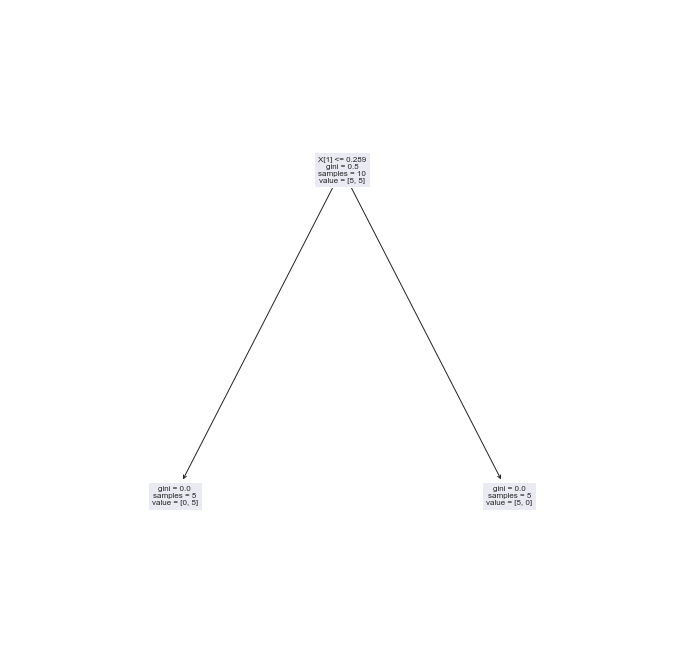

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) 
tree.plot_tree(classifier, fontsize=8) 
plt.show()

**Exercice :** Interprétez cette figure.

Cette figure nous montre que 10 images ont été triés grâce à l'arbre de décision,que 5 ont été placés dans une catégorie et 5 dans l'autre catégorie, et donc qu'il n'y a eu aucune erreur effectué par l'algorithme de classification.

### Perceptron

Le perceptron est un réseau de neurones artificiels à une seule couche
et donc avec une capacité de modélisation limitée; pour le problème
qui nous intéresse cela est suffisant. Pour plus de détails, revenez
au [cours](CM5.md)

**Exercice :** Complétez le code ci-dessous, où l'on définit un modèle
de type `Perceptron` avec comme paramètres $10^{-3}$ pour la tolérence, $36$ pour l'état aléatoire (*random state*) et 100 époques (*max_iter*)

In [14]:
from sklearn.linear_model import Perceptron

perceptron_modele = Perceptron(tol=1e-3, random_state=36, max_iter=100)
# *tol* est un autre critère d'arret
# Si loss <= previous_loss - tol alors on n'améliore pas le modèle
# en changeant les poids: on s'arrete.
perceptron_modele.fit(Xtrain, Ytrain)

#prédictions
Ytrain_predicted = perceptron_modele.predict(Xtrain)
Ytest_predicted = perceptron_modele.predict(Xtest)

# Calcul des erreurs
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)

print("Classificateur: Perceptron")
print("Training error:", e_tr)
print("Test error:", e_te)

Classificateur: Perceptron
Training error: 0.0
Test error: 0.1


**Exercice :** Lisez la documentation de `Perceptron`. À quoi
correspond le paramètre `random_state` ?

Le random_state représente la graine du nombre pseudo-aléatoire généré par le modèle de perceptron. Ce dernier est utilisé pour mélanger les données d'entrainement(si le paramètre shuffle est True).

In [15]:
help('sklearn.linear_model.Perceptron')

Help on class Perceptron in sklearn.linear_model:

sklearn.linear_model.Perceptron = class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  sklearn.linear_model.Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Linear perceptron classifier.
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  l1_ratio : float, default=0.15
 |      The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
 |      `l1_ratio=0` corresponds to L2 penalty, `l1_r

**Exercice :** Complétez la table `error_rates` avec ce modèle.

In [16]:
error_rates.loc["Perceptron",:] = [e_tr, e_te]
error_rates

,entrainement,test
1 Neighrest Neighbor,0.0,0.2
Parzen Window,0.0,0.2
Parzen Window radius=1,0.0,0.2
Parzen Window radius=2,0.0,0.2
Parzen Window radius=3,0.2,0.4
Parzen Window radius=4,0.5,0.5
Tree decision,0.0,0.2
Perceptron,0.0,0.1


In [17]:
assert error_rates.shape[0] >= 4
assert error_rates.shape[1] == 2

## $\clubsuit$ Points bonus : construction du classificateur «une règle» (*One Rule*)

Faites cette partie ou bien passez directement à la conclusion.

En complétant le code ci-dessous, créez votre premier classificateur
qui:
* sélectionne le "bon" attribut (rougeur ou élongation pour le
  problème des pommes/bananes), appelé $G$ (pour *good*). C'est
  l'attribut qui est le plus corrélé (en valeur absolue, toujours !)
  aux valeurs cibles $y = ± 1$;
* détermine une valeur seuil (*threshold*);
* utilise l'attribut `G` et le seuil pour prédire la classe des éléments.
        
Un canevas de la classe `OneRule` est fournit dans la classe
`utilities.py`; vous pouvez le compléter ou bien la programmer
entièrement vous même.

Ce classificateur est-il basé sur les attributs ou sur les exemples?

In [18]:
# Use this code to test your classifier
classifier = OneRule()
classifier.fit(Xtrain, Ytrain) 
Ytrain_predicted = classifier.predict(Xtrain)
Ytest_predicted = classifier.predict(Xtest)
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)
print("Classificateur: One rule")
print("Training error:", e_tr)
print("Test error:", e_te)

NameError: name 'OneRule' is not defined

**Exercice :** Complétez la table `error_rates` avec ce modèle.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
print(error_rates)

In [ ]:
assert error_rates.shape[0] >= 5
assert error_rates.shape[1] == 2

In [ ]:
# On charge les images
dataset_dir = os.path.join(data.dir, 'ApplesAndBananasSimple')
images = load_images(dataset_dir, "*.png")
# This is what you get as decision boundary.
# The training examples are shown as white circles and the test examples are blue squares.
make_scatter_plot(X, images.apply(transparent_background_filter),
                  [], test_index, 
                  predicted_labels='GroundTruth',
                  feat = classifier.attribute, theta=classifier.theta, axis='square')

Comparez avec ce que vous auriez obtenu en utilisant les 2 attributs avec le même poids lors de la décision de classe.

In [ ]:
make_scatter_plot(X, images.apply(transparent_background_filter),
                  [], test_index, 
                  predicted_labels='GroundTruth',
                  show_diag=True, axis='square')

### Conclusion

**Exercice :** Comparez les taux d'erreur et d'entraînement de vos
différents classificateurs pour le problème des pommes et des bananes.

VOTRE RÉPONSE ICI

Dans cette feuille vous avez découvert comment utiliser un certain
nombre de classificateurs, voire comment implanter le vôtre, et
comment jouer sur les paramètres de ces classificateurs (par exemple
la tolérance du perceptron ou le nombre de voisins du KNN) pour
essayer d'optimiser leur performance.

Mettez à jour votre rapport et déposez votre travail.

Vous êtes maintenant prêts pour revenir à votre [analyse de
données](4_analyse_de_donnees.md) pour mettre en œuvre ces
classificateurs sur votre jeu de données.

**Dans le projet 1, on vous demande de choisir un seul classificateur,
ainsi que ses paramètres**.  Nous verrons dans la seconde partie de
l'UE comment comparer systématiquement les classificateurs.